In [10]:
# !pip install pyarrow

In [9]:
import numpy as np
import pandas as pd
from kite_trade import *
import ta
from tqdm import tqdm
import datetime
import pyarrow.parquet as pq
import pyarrow as pa

In [10]:
enctoken = "m0MCz6UDDZ9fyeKsLa/xKTXFIrOd/Ywp714ZsH5xuT9OKNJzV0lDYindMx+bAV8cIj3Jj9+mtEHy8vLPPBwABqUNj6ElasUp8R6zWx9zygKSlrDvTDVZhA=="
kite = KiteApp(enctoken=enctoken)

In [11]:
# 1. filter the company i wnat to select 
# nifty 50
# all nese company
# 2. data at diffrent level ( day, min, week)


In [12]:
# nifty_50 = pd.read_csv('data/ind_nifty50list.csv')
# nifty_next_50 = pd.read_csv('data/ind_niftynext50list.csv')
# nifty_mix_500 = pd.read_csv("data/ind_nifty500Multicap502525_list.csv")
# output = "data/append_test.parquet"

# table = pa.Table.from_pandas(nifty_50)
# pq.write_to_dataset(table,root_path = output)
# table = pa.Table.from_pandas(nifty_next_50)
# pq.write_to_dataset(table,root_path = output)
# table = pa.Table.from_pandas(nifty_mix_500)
# pq.write_to_dataset(table,root_path = output)

# df = pd.read_parquet("data/append_test.parquet")

In [13]:
timerframe_list = [
"day",
"minute",
 "3minute",
 "5minute",
 "10minute",
 "15minute",
 "30minute",
 "60minute",]

# instument in nse
inst = pd.DataFrame(kite.instruments("NSE"))
inst_filter = inst.query('(name != "")').copy()
inst_filter.rename(columns = {"tradingsymbol":'Symbol'},inplace = True)
# inst_filter = inst_filter.merge(nifty_mix_500,how = 'inner', on = 'Symbol')

In [14]:
inst_filter.head()

,instrument_token,exchange_token,Symbol,name,last_price,expiry,strike,tick_size,lot_size,instrument_type,segment,exchange
0,256265,1001,NIFTY 50,NIFTY 50,0.0,None,0.0,0.0,0,EQ,INDICES,NSE
1,256777,1003,NIFTY MIDCAP 100,NIFTY MIDCAP 100,0.0,None,0.0,0.0,0,EQ,INDICES,NSE
2,260105,1016,NIFTY BANK,NIFTY BANK,0.0,None,0.0,0.0,0,EQ,INDICES,NSE
3,260617,1018,NIFTY 100,NIFTY 100,0.0,None,0.0,0.0,0,EQ,INDICES,NSE
4,257033,1004,NIFTY DIV OPPS 50,NIFTY DIV OPPS 50,0.0,None,0.0,0.0,0,EQ,INDICES,NSE


In [15]:
import time
df_all  = pd.DataFrame()
for i in range(0,100):
    # print(kite.quote('NSE:NIFTY BANK'))
    df = pd.DataFrame(kite.quote('NSE:NIFTY BANK')['NSE:NIFTY BANK'])
    df = df.reset_index()[['timestamp','index','ohlc','last_price']]
    df_all = df_all.append(df)
    time.sleep(5)
#     break

KeyError: 'data'

In [7]:
df

,timestamp,index,ohlc,last_price
0,2023-01-16 11:22:18,close,42371.25,42398.25
1,2023-01-16 11:22:18,high,42715.65,42398.25
2,2023-01-16 11:22:18,low,42375.15,42398.25
3,2023-01-16 11:22:18,open,42622.50,42398.25


In [8]:
df_1  = pd.pivot_table(df_all, index =[ 'timestamp'], columns = ['index',"last_price"]).reset_index()

In [10]:
# df_1

In [73]:
df_1  = pd.pivot_table(df_all, index =[ 'timestamp'], columns = ['index',"last_price"]).reset_index()
df_1.columns = [i[1] for i in df_1.columns]
df_1.rename(columns = {'': "Date",'close':'Close', 'high':'High', 'low':"Low", 'open': "Open"}, inplace = True)
df_1.set_index('Date', inplace = True)
df_1.index = pd.to_datetime(df_1.index)

In [101]:
df_1

,Close,High,Low,Open
Date,,,,
2023-01-12 15:07:15,17895.7,17945.8,17761.65,17920.85
2023-01-12 15:07:20,17895.7,17945.8,17761.65,17920.85
2023-01-12 15:07:26,17895.7,17945.8,17761.65,17920.85
2023-01-12 15:07:31,17895.7,17945.8,17761.65,17920.85
2023-01-12 15:07:36,17895.7,17945.8,17761.65,17920.85
...,...,...,...,...
2023-01-12 15:15:26,17895.7,17945.8,17761.65,17920.85
2023-01-12 15:15:32,17895.7,17945.8,17761.65,17920.85
2023-01-12 15:15:37,17895.7,17945.8,17761.65,17920.85


In [80]:
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime
import mplfinance as mpf

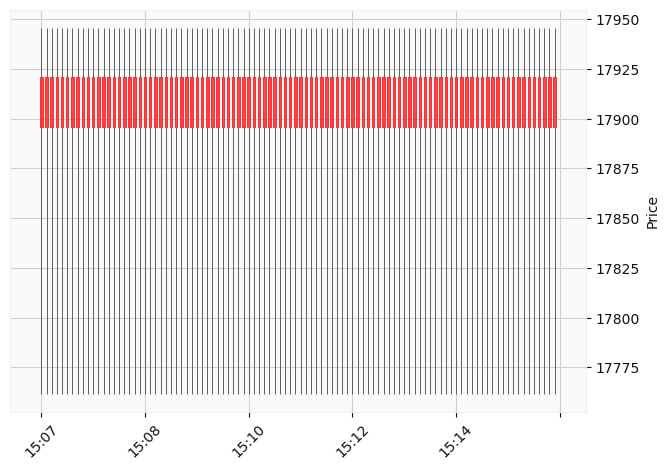

In [99]:
mpf.plot(df_1,type = 'candlestick' ,style ='yahoo')

In [75]:
fig = go.Figure(data=[go.Candlestick(x=df_1['Date'],
                open=df_1['open'],
                high=df_1['high'],
                low=df_1['low'],
                close=df_1['close'])])

fig.show()

,timestamp,index,ohlc
0,2023-01-12 14:51:54,close,17895.70
1,2023-01-12 14:51:54,high,17945.80
2,2023-01-12 14:51:54,low,17761.65
3,2023-01-12 14:51:54,open,17920.85


In [41]:
start_dt = '2022-01-01'
end_dt = '2022-10-31'

In [1]:
# for tf in tqdm(timerframe_list[0:1]):
#     print(tf)
#     comp_df = pd.DataFrame()
#     for ist in tqdm(inst_filter.instrument_token):
#         df = pd.DataFrame(pd.date_range(start_dt,end_dt)).rename(columns={0:'start_dt'})
#         df['end_dt'] = df.shift(-1)
#         df = df[df.index %2 == 0]
#         df.dropna(inplace = True)
#         try:
#             if tf == 'day':
#                 temp = pd.DataFrame(kite.historical_data(ist,pd.to_datetime(start_dt),pd.to_datetime(end_dt),tf))
#                 temp['company'] = ist
#                 comp_df = comp_df.append(temp)
#             else:        
#                 for r,c in df.iterrows():
#                     temp = pd.DataFrame(kite.historical_data(ist,c.start_dt,c.end_dt,tf))
#                     temp['company'] = ist
#                     comp_df = comp_df.append(temp)
#         except:
#             print(f"error in {inst}")
#             continue
#     table = pa.Table.from_pandas(comp_df)
#     pq.write_to_dataset(table,root_path = f"historical_data/{tf}/",partition_cols=['company'],use_threads=True)  
#     break
# df_log = pd.DataFrame([[start_dt,end_dt,datetime.datetime.now(),tf]], columns = ['min_dt',"max_dt",'time','level'])
# log_table = pa.Table.from_pandas(comp_df)
# pq.write_to_dataset(log_table, root_path = 'log/')

In [45]:
df = pd.read_parquet('historical_data/day/').sort_values('date')

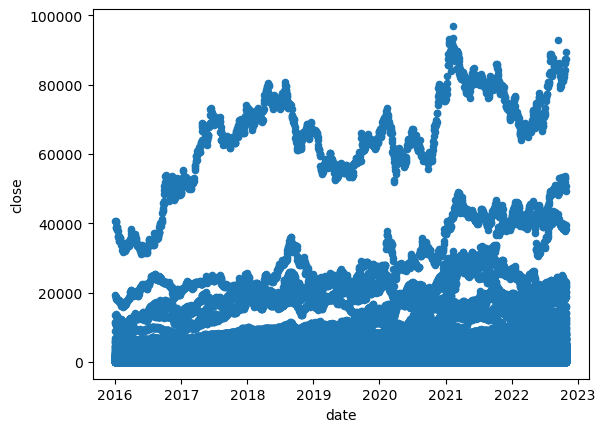

In [48]:
df.plot(x = 'date', y = "close", kind = 'scatter')

In [9]:
# %%time
# import pandas as pd
# import pyarrow.parquet

# dfall = pd.read_parquet(
#             'historical_data/minute/', engine="pyarrow",  use_threads=8
#         )

In [1]:
#%%
import numpy as np
import pandas as pd
from kite_trade import *
import os
# import ta
from tqdm import tqdm
import util_fun as uf
from enctoken import get_kite
kite = get_kite()


In [3]:

# import dask.dataframe as dd

# %%
timerframe_list = [
"day",
"minute",
 "3minute",
 "5minute",
 "10minute",
 "15minute",
 "30minute",
 "60minute",]

i=0
error_list = []
# instument in nse
inst = pd.DataFrame(kite.instruments("NSE"))
inst_filter = inst.query('(name != "")').copy()
inst_filter.rename(columns = {"tradingsymbol":'Symbol'},inplace = True)
# inst_filter.query("Symbol == 'HDFCBANK'")

nifty_500 = pd.read_csv('../data/ind_nifty500list.csv')
nifty_500 = nifty_500.merge(inst_filter, on = 'Symbol')
inst_dict = dict(zip(nifty_500.Symbol, nifty_500.instrument_token))

start_dt = '2018-01-01'
end_dt = '2023-02-27'
time_frame = 'day'
for symbol, instument in tqdm(inst_dict.items()):
    if i :
        print(symbol, instument)
        try:
            df_day = uf.get_data_parllel(kite, instument, time_frame , start_dt,end_dt)
            directory = f'../data/historical/{time_frame}/{symbol}'
            if not os.path.exists(directory):
                os.makedirs(directory)
            df_day.to_parquet(f'{directory}/part0.parquet')
            break
        except:
            print(instument)
            error_list.append(instument)

    i += 1
    
print(error_list)
    # break
          
# %%


  0%|          | 0/478 [00:00<?, ?it/s]

ABB 3329


Pandas Apply:   0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 1/478 [00:29<3:55:31, 29.63s/it]

[]


In [4]:
df_day

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-01 00:00:00+05:30,1104.05,1104.80,1086.90,1094.40,57194
2018-01-02 00:00:00+05:30,1094.65,1114.05,1088.45,1094.80,80467
2018-01-03 00:00:00+05:30,1095.45,1113.80,1095.45,1105.95,73500
2018-01-04 00:00:00+05:30,1110.30,1133.70,1106.40,1120.70,197390
2018-01-05 00:00:00+05:30,1119.70,1140.00,1118.10,1122.10,126813
...,...,...,...,...,...
2023-02-21 00:00:00+05:30,3195.65,3207.25,3145.00,3169.40,314522
2023-02-22 00:00:00+05:30,3169.95,3188.90,3129.30,3172.80,218407
2023-02-23 00:00:00+05:30,3178.00,3180.00,3122.10,3138.35,155736


### parllel processing

In [12]:
import multiprocessing
import time
import defs
from tqdm import tqdm
multiprocessing.cpu_count()

from pandas.tseries.offsets import MonthEnd
from datetime import timedelta

In [11]:
years_st = ['2016-01-01','2017-01-01','2018-01-01','2019-01-01','2020-01-01','2021-01-01','2022-01-01',]
years_end = ['2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31','2022-12-31',]
timerframe_list = [
"day",
"minute",
 "3minute",
 "5minute",
 "10minute",
 "15minute",
 "30minute",
 "60minute",]

In [12]:
for yr in range(len(years_st)):
    start_date = years_st[yr]
    end_date = years_end[yr]
    print(start_date,end_date)
    
    for tf in (timerframe_list[0:1]):   
        print(tf)
        comp_df = pd.DataFrame()
        for ist in tqdm(inst_filter.instrument_token):
            final_res = pd.DataFrame()
            start_mth = pd.date_range(start_date, end_date,freq="MS")

            start_mth = pd.DataFrame(start_mth).rename(columns = {0:'start_dt'})
            start_mth['end_dt'] = pd.to_datetime(start_mth.start_dt, format="%Y%m") + MonthEnd(0)
            start_mth['tf'] = tf
            start_mth['inst'] = ist
            start_mth['kite'] = kite

            pool = multiprocessing.Pool()
            args_lst = start_mth.values.tolist()
            async_result = [pool.apply_async(defs.temp_fun1, args=(i[0], i[1], i[2], i[3], i[4])) for i in args_lst]
#             time.sleep(1)
            results = pd.concat([(ar.get()) for ar in async_result] )

            results['company'] = ist
            comp_df = comp_df.append(results)
        table = pa.Table.from_pandas(comp_df)
        pq.write_to_dataset(table,root_path = f"historical_data/{tf}/",partition_cols=['company'],use_threads=True)  
        break
    df_log = pd.DataFrame([[start_date,end_date,datetime.datetime.now(),tf]], columns = ['min_dt',"max_dt",'time','level'])
    log_table = pa.Table.from_pandas(comp_df)
    pq.write_to_dataset(log_table, root_path = 'log/')

2020-01-01 2020-12-31
3minute


100%|█████████████████████████████████████████| 498/498 [16:10<00:00,  1.95s/it]


2021-01-01 2021-12-31
3minute


100%|█████████████████████████████████████████| 498/498 [17:15<00:00,  2.08s/it]


2022-01-01 2022-12-31
3minute


100%|█████████████████████████████████████████| 498/498 [16:48<00:00,  2.03s/it]


In [13]:
comp_df

,date,open,high,low,close,volume,company
0,2022-01-03 09:15:00+05:30,25448.00,25448.00,25361.00,25401.85,31,121345
1,2022-01-03 09:16:00+05:30,25401.85,25439.80,25358.55,25371.55,16,121345
2,2022-01-03 09:17:00+05:30,25371.55,25439.95,25371.55,25439.95,12,121345
3,2022-01-03 09:18:00+05:30,25439.95,25498.95,25417.65,25450.75,10,121345
4,2022-01-03 09:19:00+05:30,25450.75,25611.95,25432.80,25607.05,12,121345
...,...,...,...,...,...,...,...
5205,2022-10-21 15:25:00+05:30,1711.95,1711.95,1710.00,1710.00,267,4514561
5206,2022-10-21 15:26:00+05:30,1710.00,1715.00,1710.00,1714.90,80,4514561
5207,2022-10-21 15:27:00+05:30,1714.90,1719.95,1710.05,1710.05,168,4514561
5208,2022-10-21 15:28:00+05:30,1710.05,1722.00,1704.00,1704.00,247,4514561


In [13]:
pd.read_parquet('historical_data/day/')

,date,open,high,low,close,volume,company
0,2016-01-01 00:00:00+05:30,23.35,23.35,23.35,23.35,7000.0,1000449
1,2016-01-04 00:00:00+05:30,24.50,24.50,24.50,24.50,10.0,1000449
2,2016-01-05 00:00:00+05:30,25.70,25.70,25.70,25.70,5.0,1000449
3,2016-01-07 00:00:00+05:30,26.95,26.95,26.95,26.95,150.0,1000449
4,2016-01-08 00:00:00+05:30,28.25,28.25,28.25,28.25,100.0,1000449
...,...,...,...,...,...,...,...
242,2016-12-26 00:00:00+05:30,341.00,341.40,330.00,331.00,32160.0,999937
243,2016-12-27 00:00:00+05:30,334.95,336.50,330.95,335.50,22998.0,999937
244,2016-12-28 00:00:00+05:30,337.05,343.60,335.05,337.00,26620.0,999937
245,2016-12-29 00:00:00+05:30,336.05,349.50,334.55,344.40,47997.0,999937


In [14]:
# def get_diffrent_time_data(instrument_token,start_dt, end_dt,interval):
#     data = pd.DataFrame()
#     range_of_date = pd.date_range(start_dt,end_dt)

#     index_val_1 = [i for i in pd.Series(range_of_date).index if i%2 == 0]
#     index_val_2 = [i for i in pd.Series(range_of_date).index if i%2 != 0]
#     x = pd.Series(range_of_date).iloc[index_val_1].reset_index(drop = True)
#     y = pd.Series(range_of_date).iloc[index_val_2].reset_index(drop = True)
#     df_1 = pd.concat([x,y],axis = 1).rename(columns = {0:"start_dt",1:"end_dt"})
#     df_1.start_dt = pd.to_datetime(df_1.start_dt)
#     df_1.end_dt = pd.to_datetime(df_1.end_dt)
#     df_1.dropna(inplace = True)
    
#     for r,c in df_1.iterrows():
#         print(c.start_dt,c.end_dt)
#         temp = pd.DataFrame(kite.historical_data(instrument_token,c.start_dt,c.end_dt,interval))
# #     temp = pd.DataFrame(kite.historical_data(instrument_token,start_dt,end_dt,interval))
#         data = data.append(temp)
#     return data

In [15]:
# instrument_token = 6401
# start_dt = datetime.datetime(2022,1,1)    # From last & days
# end_dt = datetime.datetime.now()
# interval = "minute"
# data = get_diffrent_time_data(instrument_token,start_dt, end_dt,interval)
# #     data.date = pd.to_datetime(data.date,unit = "ms")
# # data.date = pd.to_datetime(pd.to_datetime(data.date).dt.date)
# data.rename(columns = {'date': "Date"},inplace = True)
# data.set_index('Date', inplace = True)
# data.columns = ['Open','High','Low',"Close","Volumne"]